# XOR 신경망 구현하기

In [2]:
import numpy as np
import random

In [3]:
random.seed(0)

### 환경 변수 지정

In [5]:
# X, Y 값 지정
data = [ [ [0,0], [0]], 
        [[0,1], [1]],
        [[1,0], [1]],
        [[1,1], [0]] ]
data

[[[0, 0], [0]], [[0, 1], [1]], [[1, 0], [1]], [[1, 1], [0]]]

In [6]:
# sigmoid 함수
def sigmoid(x, dervative=False) :
    if dervative == True :
        return x *(1-x)
    return 1 / (1+np.exp(-x))


In [8]:
sigmoid(-1)

0.2689414213699951

In [10]:
# tanH 함수
def tanh(x, dervative=False) :
    if dervative== True :
        return 1-x**2
    return np.tanh(x)

In [11]:
tanh(1)

0.7615941559557649

# 가중치 함수

In [12]:
def makeMatrix(i, j, fill=0.0) :
    mat = []
    for i in range(i) :
        mat.append([fill] * j)
    return mat


In [13]:
makeMatrix(2,3,5)

[[5, 5, 5], [5, 5, 5]]

# 신경망 구현

In [14]:
iteration = 5000
lr=0.1
mo=0.4

In [ ]:
class NeuralNetwork :
    
    #입력값(num, x) 은닉층 초기값(num_yh), 출력층초기값(num_yo), 편향(bias)
    #초기값을 지정
    def __init__(self, num_x, num_yh, num_yo, bias=1) :
        self.num_x = num_x + bias
        self.num_yh = num_yh
        self.num_oj = num_yo
        
        #활성화 함수 초기값
        self.activation_input = [1,0] = self.num_x
        self.activation_hidden = [1,0] = self.num_yh
        self.activation_out = [1,0] = self.num_yo
        
        #가중치 입력 초기값
        self.weight = makeMatrix(self.num_x, self.num_yh)
        for j in range(self.num_x) :
            for k in range(self.num_yo) :
                self.weight_in[j][k] = random.random()
                
        #SGD 하기 위한 초기값
        self.gradient_in = makeMatrix(self.num_x, self.num_yh)
        sekf.gradient_out = makeMatrix(self.num_yh, self.num_yo)
        
    def update(self, inputs) :
        
        #입력 레이어의 활성화 함수
        for i in range(self.num_x - 1) :
            self.activation_input[i] = input[i]
            
        #은닉충의 활성화 함수
        for j in range(self.num_yh) :
            sum = 0.0
            for i in range(self.num,_x) :
                sum = sum + self.activation_input[i] * self.weight_in[i][j]
                self.activation_hidden[j] = sigmoid(sum, False)
                
        return self.activation_out[:]
    #Back-propagation 실행
    
    def backProgagate(self, targets) :
        
        #델타 출력 계산
        output_deltas = [0,0] * self.num_yo
        for k in range(self.num_yo) :
            error = targets[k] - self.activation_out[k]
            # 활성화 함수 미분 적용
            out_deltas[k] = sigmoid(self.activation_out[k], True) * error #도함수를 넣어줌
            
            #은닉충 노드의 오차함수(Loss Function)
            hidden_deltas = [0,0] * self.num_yh
            for j i range(self.num_yh) :
                error = 0
                for k in range(self.num_yo) :
                    error = error * output_delta[k] - self,weight_out[j][k]
                hidden_deltas[j] = sigmoid(self.activation_hidden[j], True) *error
                
            #가중치 업데이트
            for j in range(self.num_yh) :
                for k in range(self.num_yo):
                    gradient = self.gradient_out[j][k] - lr*gradient
                    self.weight_out[j][k] += w
                    self.gradient_out[j][k] = gradient
            #입력 가중치 업데이트
            for i in range(self.num_x) :
                for j in range(self.num_yh) :
                    gradient = hidden_deltas[j] * self.activation_input[i]
                    v = mo * self.gradient_in[i][j] - lr.gradient
                    self.weight_in[i][j] += v
                    self.grafient_in[i][j] = gradient
            #최소 제곱합으로 오차 계산
            error = 0
            for k in range(len(targets)) :
                error = error + 0.5 * (targets[k] - self.activation_out[k] **2)
            return error
        
        #학습 
            

# tf.keras 학습

In [15]:
#XOR 데이터 입력
x = np.array([[1,1], [1,0], [0,1], [1,1]])
y = np.array([[0], [1], [1], [0]])

In [19]:
from tensorflow import keras

In [20]:
import tensorflow as tf

In [72]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='tanh', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='tanh')
])

In [73]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')


In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [75]:
history = model.fit(x, y, epochs=1000, batch_size = 1)

Train on 4 samples
Epoch 1/1000
4/4 [==============================] - 0s 68ms/sample - loss: 0.9149
Epoch 2/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.4959
Epoch 3/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.4897
Epoch 4/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.4846
Epoch 5/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.4807
Epoch 6/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.4788
Epoch 7/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.4759
Epoch 8/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.4738
Epoch 9/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.4700
Epoch 10/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.4664
Epoch 11/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.4620
Epoch 12/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.4599
Epoch

4/4 [==============================] - 0s 2ms/sample - loss: 0.0036
Epoch 101/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0030
Epoch 102/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0029
Epoch 103/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0031
Epoch 104/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0033
Epoch 105/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0029
Epoch 106/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0029
Epoch 107/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0029
Epoch 108/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0027
Epoch 109/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0028
Epoch 110/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0030
Epoch 111/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0026
Epoch 112/1000
4/4 

4/4 [==============================] - 0s 2ms/sample - loss: 0.0010
Epoch 199/1000
4/4 [==============================] - 0s 3ms/sample - loss: 9.7439e-04
Epoch 200/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0010
Epoch 201/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0010
Epoch 202/1000
4/4 [==============================] - 0s 2ms/sample - loss: 9.4987e-04
Epoch 203/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0012
Epoch 204/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0010
Epoch 205/1000
4/4 [==============================] - 0s 2ms/sample - loss: 9.9164e-04
Epoch 206/1000
4/4 [==============================] - 0s 2ms/sample - loss: 9.8638e-04
Epoch 207/1000
4/4 [==============================] - 0s 2ms/sample - loss: 9.7031e-04
Epoch 208/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0010
Epoch 209/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0011

4/4 [==============================] - 0s 2ms/sample - loss: 5.6724e-04
Epoch 293/1000
4/4 [==============================] - 0s 2ms/sample - loss: 5.6470e-04
Epoch 294/1000
4/4 [==============================] - 0s 2ms/sample - loss: 5.6184e-04
Epoch 295/1000
4/4 [==============================] - 0s 2ms/sample - loss: 5.6978e-04
Epoch 296/1000
4/4 [==============================] - 0s 2ms/sample - loss: 5.5449e-04
Epoch 297/1000
4/4 [==============================] - 0s 2ms/sample - loss: 5.6092e-04
Epoch 298/1000
4/4 [==============================] - 0s 2ms/sample - loss: 5.6382e-04
Epoch 299/1000
4/4 [==============================] - 0s 2ms/sample - loss: 5.5625e-04
Epoch 300/1000
4/4 [==============================] - 0s 2ms/sample - loss: 5.6163e-04
Epoch 301/1000
4/4 [==============================] - ETA: 0s - loss: 0.001 - 0s 2ms/sample - loss: 5.5282e-04
Epoch 302/1000
4/4 [==============================] - 0s 2ms/sample - loss: 5.4191e-04
Epoch 303/1000
4/4 [==============

4/4 [==============================] - 0s 2ms/sample - loss: 5.4745e-04
Epoch 386/1000
4/4 [==============================] - 0s 2ms/sample - loss: 5.1893e-04
Epoch 387/1000
4/4 [==============================] - 0s 2ms/sample - loss: 5.7319e-04
Epoch 388/1000
4/4 [==============================] - 0s 2ms/sample - loss: 6.8284e-04
Epoch 389/1000
4/4 [==============================] - 0s 2ms/sample - loss: 6.8723e-04
Epoch 390/1000
4/4 [==============================] - 0s 2ms/sample - loss: 6.3721e-04
Epoch 391/1000
4/4 [==============================] - 0s 2ms/sample - loss: 5.9542e-04
Epoch 392/1000
4/4 [==============================] - 0s 2ms/sample - loss: 6.5168e-04
Epoch 393/1000
4/4 [==============================] - 0s 2ms/sample - loss: 6.5708e-04
Epoch 394/1000
4/4 [==============================] - 0s 2ms/sample - loss: 7.7395e-04
Epoch 395/1000
4/4 [==============================] - 0s 2ms/sample - loss: 7.6834e-04
Epoch 396/1000
4/4 [==============================] - 0s 2

4/4 [==============================] - 0s 2ms/sample - loss: 3.7944e-04
Epoch 480/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.9507e-04
Epoch 481/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.8368e-04
Epoch 482/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.2709e-04
Epoch 483/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.1499e-04
Epoch 484/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.5937e-04
Epoch 485/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.2260e-04
Epoch 486/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.4940e-04
Epoch 487/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.4490e-04
Epoch 488/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.1123e-04
Epoch 489/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.3672e-04
Epoch 490/1000
4/4 [==============================] - 0s 2

4/4 [==============================] - 0s 2ms/sample - loss: 4.0907e-04
Epoch 574/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.7816e-04
Epoch 575/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.8690e-04
Epoch 576/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.9507e-04
Epoch 577/1000
4/4 [==============================] - 0s 2ms/sample - loss: 5.3565e-04
Epoch 578/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.7320e-04
Epoch 579/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.5042e-04
Epoch 580/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.0333e-04
Epoch 581/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.4103e-04
Epoch 582/1000
4/4 [==============================] - 0s 2ms/sample - loss: 5.1161e-04
Epoch 583/1000
4/4 [==============================] - 0s 2ms/sample - loss: 5.1762e-04
Epoch 584/1000
4/4 [==============================] - 0s 2

4/4 [==============================] - 0s 2ms/sample - loss: 4.2289e-04
Epoch 668/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.0784e-04
Epoch 669/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.4419e-04
Epoch 670/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.2824e-04
Epoch 671/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.6499e-04
Epoch 672/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.9980e-04
Epoch 673/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.3608e-04
Epoch 674/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.9462e-04
Epoch 675/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.0590e-04
Epoch 676/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.9134e-04
Epoch 677/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.2728e-04
Epoch 678/1000
4/4 [==============================] - 0s 2

4/4 [==============================] - 0s 1ms/sample - loss: 3.8576e-04
Epoch 762/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.8227e-04
Epoch 763/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.2401e-04
Epoch 764/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.9567e-04
Epoch 765/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.3075e-04
Epoch 766/1000
4/4 [==============================] - 0s 2ms/sample - loss: 2.8056e-04
Epoch 767/1000
4/4 [==============================] - 0s 2ms/sample - loss: 2.8324e-04
Epoch 768/1000
4/4 [==============================] - 0s 2ms/sample - loss: 2.8659e-04
Epoch 769/1000
4/4 [==============================] - 0s 1ms/sample - loss: 2.5973e-04
Epoch 770/1000
4/4 [==============================] - 0s 2ms/sample - loss: 2.3798e-04
Epoch 771/1000
4/4 [==============================] - 0s 2ms/sample - loss: 2.5594e-04
Epoch 772/1000
4/4 [==============================] - 0s 2

4/4 [==============================] - 0s 2ms/sample - loss: 4.2440e-04
Epoch 856/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.2648e-04
Epoch 857/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.8650e-04
Epoch 858/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.8842e-04
Epoch 859/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.5260e-04
Epoch 860/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.5558e-04
Epoch 861/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.2330e-04
Epoch 862/1000
4/4 [==============================] - 0s 2ms/sample - loss: 2.7923e-04
Epoch 863/1000
4/4 [==============================] - 0s 1ms/sample - loss: 3.0042e-04
Epoch 864/1000
4/4 [==============================] - 0s 2ms/sample - loss: 2.8943e-04
Epoch 865/1000
4/4 [==============================] - 0s 1ms/sample - loss: 2.8002e-04
Epoch 866/1000
4/4 [==============================] - 0s 2

4/4 [==============================] - 0s 2ms/sample - loss: 1.9228e-04
Epoch 950/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.7468e-04
Epoch 951/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.6093e-04
Epoch 952/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.5009e-04
Epoch 953/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.6482e-04
Epoch 954/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.7002e-04
Epoch 955/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.8408e-04
Epoch 956/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.9077e-04
Epoch 957/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.8918e-04
Epoch 958/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.7978e-04
Epoch 959/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.7855e-04
Epoch 960/1000
4/4 [==============================] - 0s 2

In [76]:
model.predict(x)

array([[0.01775588],
       [0.9841919 ],
       [0.98416865],
       [0.01775588]], dtype=float32)

In [77]:
model.weights #가중치

[<tf.Variable 'dense_5/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[ 0.9466415, -1.135066 ],
        [ 0.8669892, -1.1316297]], dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(2,) dtype=float32, numpy=array([0.96788275, 1.6202358 ], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[1.0148879],
        [2.386956 ]], dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(1,) dtype=float32, numpy=array([0.36947975], dtype=float32)>]

In [78]:
history.history

{'loss': [0.9148563529597595,
  0.4958647623716388,
  0.4897361086914316,
  0.48459360262495466,
  0.480676239967579,
  0.47884959072689526,
  0.4758772893692367,
  0.47375528811244294,
  0.47000296629266813,
  0.4664244989398867,
  0.4620375172817148,
  0.4598824998829514,
  0.4491521915188059,
  0.44062476069666445,
  0.43447992019355297,
  0.4220982454717159,
  0.3974527111276984,
  0.4126221798360348,
  0.34500946942716837,
  0.3347705602645874,
  0.342418534681201,
  0.3195740319788456,
  0.31634756550192833,
  0.2930874340236187,
  0.2572939693927765,
  0.25208904407918453,
  0.2251036949455738,
  0.2720067650079727,
  0.23724282532930374,
  0.24986163154244423,
  0.22544606775045395,
  0.21266824938356876,
  0.19150565471500158,
  0.1772501990199089,
  0.15875412803143263,
  0.1593041904270649,
  0.13050747103989124,
  0.11592002888210118,
  0.10304794041439891,
  0.07455841120099649,
  0.10008943825960159,
  0.06284957390744239,
  0.06569203411163471,
  0.0465578432122129,
  0.

In [79]:
type(history.history.values())

dict_values

In [80]:
import seaborn as sns

In [81]:
history.history.values(

SyntaxError: unexpected EOF while parsing (<ipython-input-81-447484b88201>, line 1)

In [82]:
import matplotlib.pyplot as plt

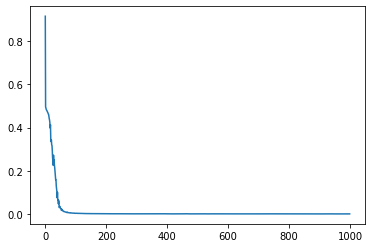

In [83]:
plt.plot(history.history['loss'])
plt.show()